# RANDOM FOREST CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('risk.csv')


df.head()

,outcome,age,gendera,BMI,hypertensive,diabetes,depression,heart rate,Systolic blood pressure,Diastolic blood pressure,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Magnesium ion,PH,Lactic acid,PCO2
0,2.0,72.0,1.0,37.588179,0.0,1.0,0.0,68.837838,155.866667,68.333333,...,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,2.618182,7.230,0.5,40.0
1,2.0,75.0,2.0,NaN,0.0,0.0,0.0,101.370370,140.000000,65.000000,...,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,1.887500,7.225,0.5,78.0
2,2.0,83.0,2.0,26.572634,0.0,0.0,0.0,72.318182,135.333333,61.375000,...,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,2.157143,7.268,0.5,71.5
3,2.0,43.0,2.0,83.264629,0.0,0.0,0.0,94.500000,126.400000,73.200000,...,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,1.942857,7.370,0.6,75.0
4,2.0,75.0,2.0,31.824842,1.0,0.0,0.0,67.920000,156.560000,58.120000,...,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,1.650000,7.250,0.6,50.0


In [3]:
df.shape

(1177, 30)

In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['outcome', 'age', 'gendera', 'BMI', 'hypertensive', 'diabetes',
       'depression', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Magnesium ion', 'PH', 'Lactic acid',
       'PCO2'],
      dtype='object')

In [6]:
df.tail()

,outcome,age,gendera,BMI,hypertensive,diabetes,depression,heart rate,Systolic blood pressure,Diastolic blood pressure,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Magnesium ion,PH,Lactic acid,PCO2
1094,0.0,37.0,1.0,26.255155,0.0,0.0,0.0,107.400000,101.227273,69.818182,...,36.153846,140.500000,4.553846,126.230769,8.000000,92.923077,2.141667,7.430000,4.200000,21.000000
1096,1.0,75.0,2.0,33.341435,1.0,0.0,0.0,125.769231,103.303030,58.363636,...,39.882353,270.833333,3.770588,142.235294,7.747059,111.058824,1.994118,7.341667,4.373333,37.750000
1097,1.0,86.0,1.0,23.240741,1.0,1.0,0.0,117.784314,101.192982,51.754386,...,77.285714,149.500000,3.940000,134.733333,8.230769,99.400000,2.428571,7.253333,4.600000,47.222222
1099,1.0,43.0,2.0,19.682579,0.0,0.0,0.0,84.067797,90.547619,56.404762,...,49.500000,127.666667,6.566667,137.666667,8.200000,103.666667,2.200000,7.090000,6.500000,54.000000
1100,0.0,89.0,2.0,28.617364,1.0,1.0,0.0,92.000000,103.625000,43.360000,...,23.000000,138.000000,4.080000,138.100000,8.344444,101.600000,2.110000,7.230000,8.333333,26.500000


In [7]:
x1 = df.drop(labels='outcome', axis=1)
y1 = df.loc[:,'outcome']

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0.0: 529, 1.0: 96, 2.0: 16})
OVER SAMPLING DATA COUNT  :  Counter({2.0: 529, 0.0: 529, 1.0: 529})


C:\Users\krish\anaconda3\envs\risk\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\krish\anaconda3\envs\risk\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  1269
NUMBER OF TEST DATASET      :  318
TOTAL NUMBER OF DATASET    :  1587


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  1269
NUMBER OF TEST DATASET      :  318
TOTAL NUMBER OF DATASET    :  1587


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [13]:
predicted = RFC.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


 [[104   0   2]
 [  0 106   0]
 [  0   0 106]]


In [15]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RFC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [97.48427673 99.68553459 97.47634069 97.47634069 99.36908517]


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 99.37106918238993


In [17]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 0.628930817610063


In [18]:
from sklearn.metrics import classification_report
R = classification_report(y_test,predicted)
print("THE RECALL SCORE OF RANDOM FOREST CLASSIFIER IS\n :",R*100)

THE RECALL SCORE OF RANDOM FOREST CLASSIFIER IS
 :               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       106
         1.0       1.00      1.00      1.00       106
         2.0       0.98      1.00      0.99       106

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       106
         1.0       1.00      1.00      1.00       106
         2.0       0.98      1.00      0.99       106

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       106
         1.0       1.00      1.00      1.00       106
         2.0       0.98   

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


[[104   0   2]
 [  0 106   0]
 [  0   0 106]]


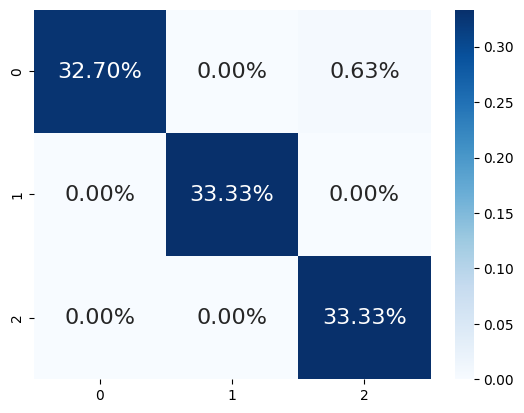

In [19]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

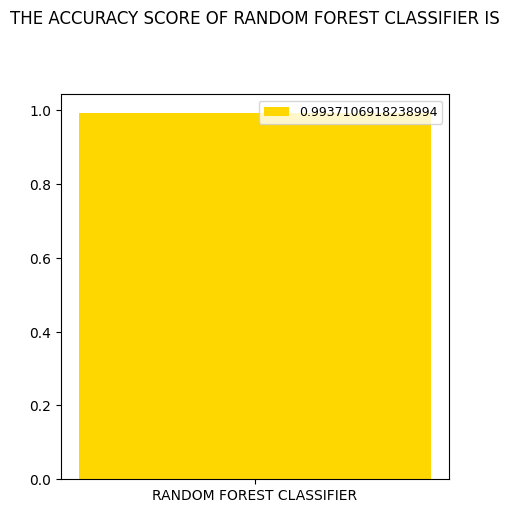

In [20]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="RANDOM FOREST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("gold"))
    plt.title("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [21]:
import joblib
joblib.dump(RFC, 'model.pkl')

['model.pkl']